In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Fertilizer.csv")

In [ ]:
df.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea


In [ ]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


In [ ]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', 'Fourteen-Thirty Five-Fourteen',
       'Twenty Eight-Twenty Eight', 'Seventeen-Seventeen-Seventeen',
       'Twenty-Twenty', 'Ten-Twenty Six-Twenty Six'], dtype=object)

In [ ]:
df['Fertilizer Name'].value_counts()

Urea                             22
DAP                              18
Twenty Eight-Twenty Eight        17
Fourteen-Thirty Five-Fourteen    14
Twenty-Twenty                    14
Seventeen-Seventeen-Seventeen     7
Ten-Twenty Six-Twenty Six         7
Name: Fertilizer Name, dtype: int64

<Axes: xlabel='Fertilizer Name', ylabel='count'>

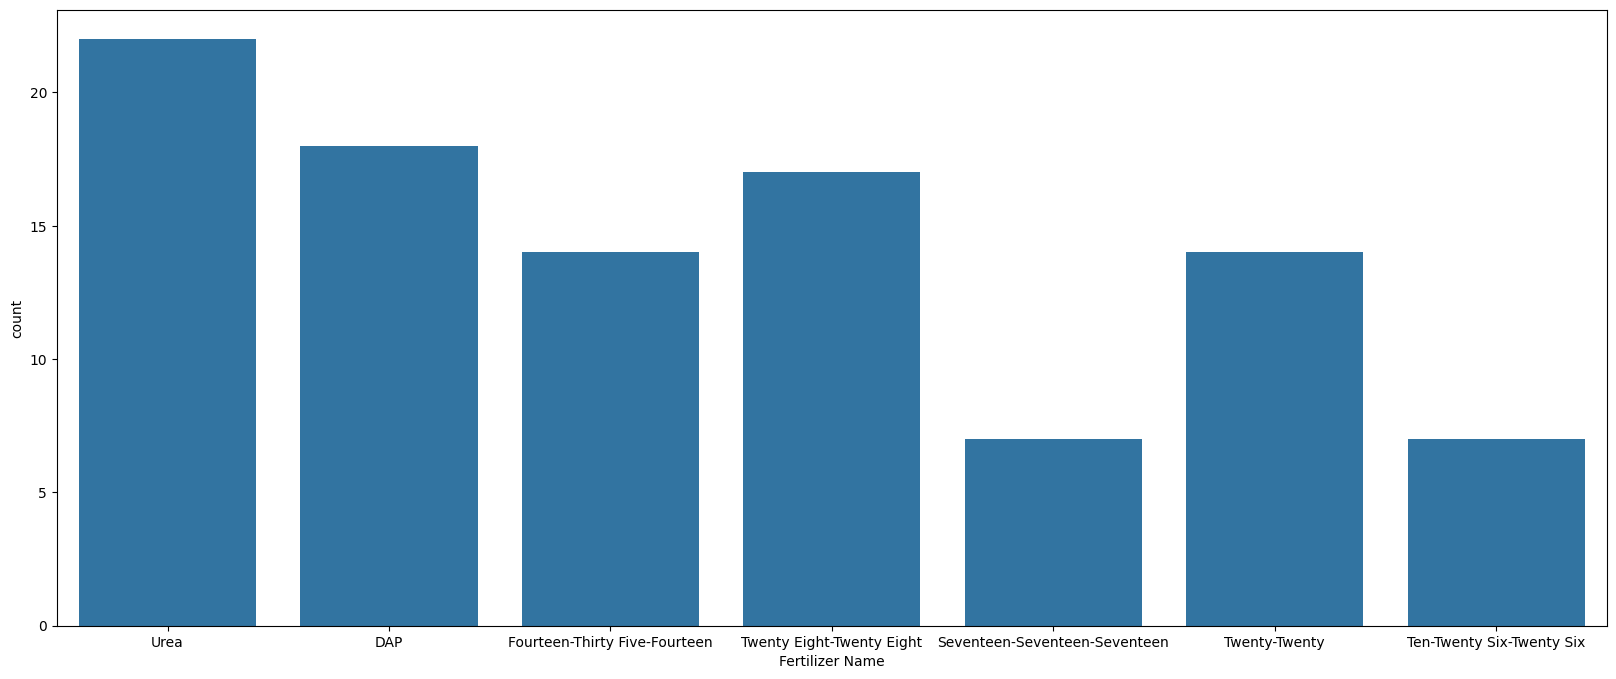

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.countplot(x='Fertilizer Name', data = df)

In [ ]:
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=df['Fertilizer Name'],shuffle=True)

In [ ]:
X_train.shape
X_train.describe
X_train['Nitrogen'].value_counts()
X_train['Phosphorous'].value_counts()
X_train['Potassium'].value_counts()

0     56
9      4
10     3
7      3
8      2
18     2
13     2
19     2
14     2
17     1
16     1
15     1
Name: Potassium, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]

array([-0.87657272,  1.08967857,  0.86417261])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test)
X_train.shape,y_train.shape,y_test.shape,X_test.shape,y_pred.shape

((79, 3), (79,), (20,), (20, 3), (20,))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[4 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 5]]


1.0

In [ ]:
print(classification_report(y_test,y_pred))

                               precision    recall  f1-score   support

                          DAP       1.00      1.00      1.00         4
Fourteen-Thirty Five-Fourteen       1.00      1.00      1.00         3
Seventeen-Seventeen-Seventeen       1.00      1.00      1.00         1
    Ten-Twenty Six-Twenty Six       1.00      1.00      1.00         1
    Twenty Eight-Twenty Eight       1.00      1.00      1.00         3
                Twenty-Twenty       1.00      1.00      1.00         3
                         Urea       1.00      1.00      1.00         5

                     accuracy                           1.00        20
                    macro avg       1.00      1.00      1.00        20
                 weighted avg       1.00      1.00      1.00        20

